#  Análisis Supervisado de Clasificación

## Dataset de gustos de peliculas

Dicho dataset a analizar contiene distintas clasificaciones de una persona respecto a varias peliculas que vio.
En el presente proyecto iremos desarrollando distintas maneras de analizarlo en base a diferentes tecnicas.
Daremos uso de bosques aleatorios, SVM, regresión logística y KNN.

## Análisis exploratorio de los datos

In [1]:
#Libreria que vamos a utilizar para el análisis
import pandas as pd#Para cargar y manipular la base de datos
import matplotlib.pyplot as plt#Graficos
import random#Establecer una semilla aleatoria para que el ejercicio se compute exactamente igual

In [2]:
start = pd.read_excel(r"C:\Users\Nahuel\Desktop\DataSets a Estudiar\My Personal Movie DataSet\data.xlsx")#Cargamos la tabla
random.seed(21)#Semilla

In [3]:
start.shape#Observamos las dimensiones, esta bien saberlas desde un principio, ya que luego procederemos a filtrar los NaN's

(330, 12)

In [4]:
start.head()#Los datos resultan estar bien cargados

RNK           TITLE  RATE           DIRECTOR  YEAR    GENRE 1    GENRE 2  \
0    1    The Prestige  10.0  Christopher Nolan  2006    Mystery     Sci-Fi   
1    2    Interstellar  10.0  Christopher Nolan  2014     Sci-Fi  Adventure   
2    3       Inception  10.0  Christopher Nolan  2010     Sci-Fi  Adventure   
3    4            Cars   9.0      John Lasseter  2006  Animation      Sport   
4    5  Predestination   9.0     Michal Spierig  2014     Sci-Fi      Drama   

                 ACT 1           ACT 2          ACT 3               ACT 4  \
0       Christian Bale    Hugh Jackman  Michael Caine  Scarlett Johansson   
1  Matthew McConaughey   Anne Hathaway  Michael Caine    Jessica Chastain   
2    Leonardo DiCaprio  Cillian Murphy  Michael Caine    Marion Cotillard   
3                  NaN             NaN            NaN                 NaN   
4          Ethan Hawke     Noah Taylor    Sarah Snook      Madeleine West   

                  ACT 5  
0           Andy Serkis  
1     Timothée Chalamet  
2  Joseph Gordon-Levitt  
3                   NaN  
4     Christopher Kirby

In [5]:
df = start.drop(["RNK"], axis=1)#Elegimos dropear RNK ya que es una variable sin valor en este caso, 
#RNK estaria cumpliendo el mismo proposito del indice, ya que estan ordenados

In [6]:
df.head()

TITLE  RATE           DIRECTOR  YEAR    GENRE 1    GENRE 2  \
0    The Prestige  10.0  Christopher Nolan  2006    Mystery     Sci-Fi   
1    Interstellar  10.0  Christopher Nolan  2014     Sci-Fi  Adventure   
2       Inception  10.0  Christopher Nolan  2010     Sci-Fi  Adventure   
3            Cars   9.0      John Lasseter  2006  Animation      Sport   
4  Predestination   9.0     Michal Spierig  2014     Sci-Fi      Drama   

                 ACT 1           ACT 2          ACT 3               ACT 4  \
0       Christian Bale    Hugh Jackman  Michael Caine  Scarlett Johansson   
1  Matthew McConaughey   Anne Hathaway  Michael Caine    Jessica Chastain   
2    Leonardo DiCaprio  Cillian Murphy  Michael Caine    Marion Cotillard   
3                  NaN             NaN            NaN                 NaN   
4          Ethan Hawke     Noah Taylor    Sarah Snook      Madeleine West   

                  ACT 5  
0           Andy Serkis  
1     Timothée Chalamet  
2  Joseph Gordon-Levitt  
3                   NaN  
4     Christopher Kirby

In [7]:
df.dtypes#Realmente todos deberian de ser tratados como objetos, ya que el año en este dataframe cumple una funcion de variable
#Categorica y no de continua, es una variable que le da un adjetivo al objeto, 
#no proporciona una evolucion en el tiempo.


TITLE        object
RATE        float64
DIRECTOR     object
YEAR          int64
GENRE 1      object
GENRE 2      object
ACT 1        object
ACT 2        object
ACT 3        object
ACT 4        object
ACT 5        object
dtype: object

In [8]:
df = df.dropna()#Limpieza de NaN's antes de realizar un grafico de correlación, 
#este paso se realiza previamente a la creacion de dummies, de no hacerlo podriamos tener filas
#repletas de 0 y no es lo ideal, podria sesgar el análisis.
df.shape

(203, 11)

In [9]:
def CreateDummies(df, ColumnDividir):#Funcion para creacion de dummies
    df2 = pd.get_dummies(df[ColumnDividir], prefix = ColumnDividir)
    df = df.drop([ColumnDividir], axis = 1)
    df = pd.concat([df, df2], axis = 1)
    return df

In [10]:
df_a = df[["RATE", "GENRE 1"]]#Selecciono solo Rate y GENRE 1, ya que queremos saber si existe preferencias en cuanto a generos 
#Por parte de nuestro cliente, público o socio.
df_a = CreateDummies(df_a, "GENRE 1" )

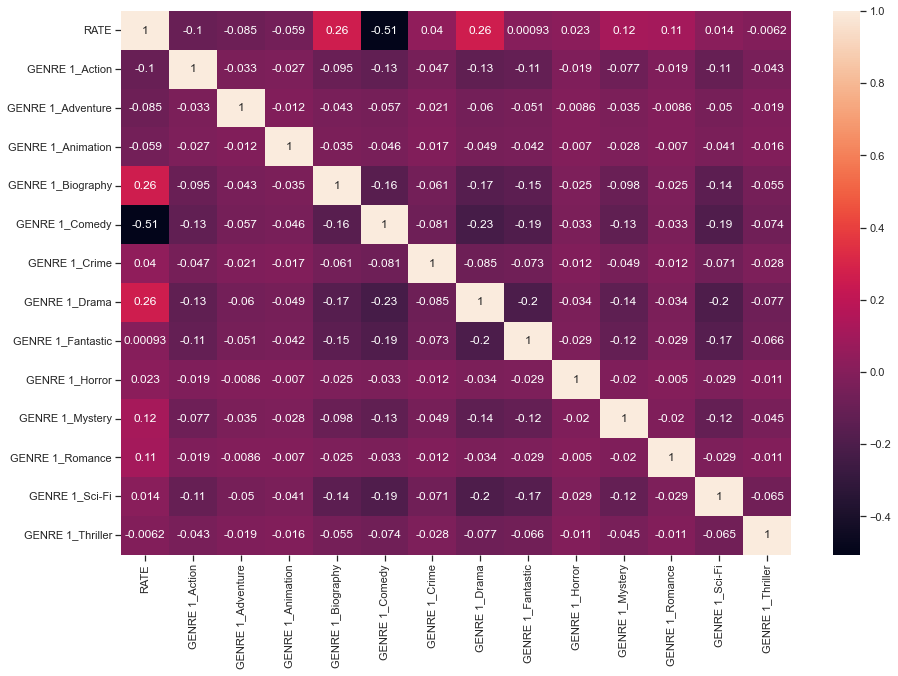

In [11]:
import seaborn as sns#Libreria para creacion de graficos de calor
sns.set(style = "ticks", color_codes=True)
plt.figure(figsize=(15,10))
sns.heatmap(df_a.corr(), annot=True)
plt.show()
#La fila/columna a observar debe ser la primera de todas en este caso, podemos notar que el consumidor tiene una preferencia 
#notable en 3 generos, como son la comedia, drama y biografias.
#Esto es algo importante a recordar para mas adelante cuando trabajemos con seleccion de variables con SKLearn.

In [12]:
df = df.astype(object)#Convertimos todos a objetos, aunque observaremos mas adelante como RATE lo volvemos a pasar a número.
df.dtypes

TITLE       object
RATE        object
DIRECTOR    object
YEAR        object
GENRE 1     object
GENRE 2     object
ACT 1       object
ACT 2       object
ACT 3       object
ACT 4       object
ACT 5       object
dtype: object

Text(0.5, 1.0, 'Frecuencia de Score de Películas')

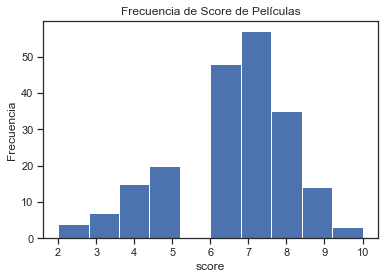

In [13]:
plt.hist(df["RATE"], bins = 10)
plt.xlabel("score")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Score de Películas")
#Podemos observar que lo más frecuente es que vote entre 6 y 8.
#Hay algo importante a fijarse, y es que la cantidad de votos con 2,3 y 10 son extremadamente bajos.
#Esto podria darnos problemas con algoritmos como RandomForest, ya que ellos necesitan almenos 5 muestras para crear un nodo 
#de decisión. Ya podemos ir pensando que randomforest tal vez no sea la mejor manera de tratar este dataframe.

Text(0.5, 1.0, 'Frecuencia de Año de Estreno de Películas')

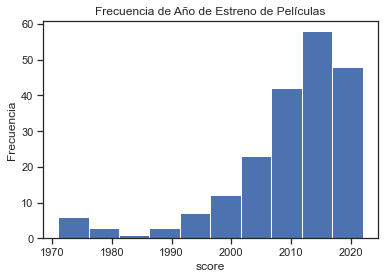

In [14]:
plt.hist(df["YEAR"])
plt.xlabel("score")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Año de Estreno de Películas")
#Notamos un sesgo importante, una gran parte de peliculas son de los ultimos 10 años.

In [15]:
df["GENRE 1"].unique() #Generos que existen en GENRE 1

array(['Mystery', 'Sci-Fi', 'Biography', 'Drama', 'Romance', 'Crime',
       'Action', 'Fantastic', 'Horror', 'Thriller', 'Comedy', 'Adventure',
       'Animation'], dtype=object)

In [16]:
genre_count = df.groupby(["GENRE 1"])["GENRE 1"].count()
genre_count #Podemos ver que la mayoria de peliculas son de los generos de comedia y drama, lo cual puede estar sesgando a la correlacion que 
#evaluamos antes, o incluso sesgar la eleccion de variables.

GENRE 1
Action       14
Adventure     3
Animation     2
Biography    22
Comedy       36
Crime         6
Drama        39
Fantastic    30
Horror        1
Mystery      15
Romance       1
Sci-Fi       29
Thriller      5
Name: GENRE 1, dtype: int64

In [17]:
df.columns.values.tolist()#Todas las columnas del dataframe

['TITLE',
 'RATE',
 'DIRECTOR',
 'YEAR',
 'GENRE 1',
 'GENRE 2',
 'ACT 1',
 'ACT 2',
 'ACT 3',
 'ACT 4',
 'ACT 5']

## Variable Target y Variables Predictoras

En esta sección nos centraremos en ya ir moldeando tantos las variables X(nuestras variables que nos ayudan a predecir) como las 
variables Y(las que nos interesan predecir), daremos uso de la función de dummies que creamos antes y algunas técnicas para separar dichas variables de manera simple y efectiva.

In [18]:
df = CreateDummies(df, "GENRE 1" )
df = CreateDummies(df, "GENRE 2" )
df = CreateDummies(df, "YEAR" )
df = CreateDummies(df, "DIRECTOR" )
df = CreateDummies(df, "ACT 1" )
df = CreateDummies(df, "ACT 2" )
df = CreateDummies(df, "ACT 3" )
df = CreateDummies(df, "ACT 4" )
df = CreateDummies(df, "ACT 5" )

In [19]:
df.head()

TITLE  RATE  GENRE 1_Action  GENRE 1_Adventure  GENRE 1_Animation  \
0    The Prestige  10.0               0                  0                  0   
1    Interstellar  10.0               0                  0                  0   
2       Inception  10.0               0                  0                  0   
4  Predestination   9.0               0                  0                  0   
5            Rush   9.0               0                  0                  0   

   GENRE 1_Biography  GENRE 1_Comedy  GENRE 1_Crime  GENRE 1_Drama  \
0                  0               0              0              0   
1                  0               0              0              0   
2                  0               0              0              0   
4                  0               0              0              0   
5                  1               0              0              0   

   GENRE 1_Fantastic  ...  ACT 5_Yahya Abdul-Mateen II  \
0                  0  ...                            0   
1                  0  ...                            0   
2                  0  ...                            0   
4                  0  ...                            0   
5                  0  ...                            0   

   ACT 5_Yuri Kolokolnikov  ACT 5_Zafer Algöz  ACT 5_Zeynep Karacan  \
0                        0                  0                     0   
1                        0                  0                     0   
2                        0                  0                     0   
4                        0                  0                     0   
5                        0                  0                     0   

   ACT 5_Zihni Göktay  ACT 5_Zuleyka Silver  ACT 5_Çağlar Çorumlu  \
0                   0                     0                     0   
1                   0                     0                     0   
2                   0                     0                     0   
4                   0                     0                     0   
5                   0                     0                     0   

   ACT 5_Özge Borak  ACT 5_İbrahim Büyükak  ACT 5_Şinasi Yurtsever  
0                 0                      0                       0  
1                 0                      0                       0  
2                 0                      0                       0  
4                 0                      0                       0  
5                 0                      0                       0  

[5 rows x 997 columns]

In [20]:
df = df.drop(["TITLE"], axis = 1)#El titulo no nos será util a la hora de predecir.

In [21]:
df.head()#Tenemos un dataset de 996 columnas, lo cual tiene sentido despues de crear tantas dummies

RATE  GENRE 1_Action  GENRE 1_Adventure  GENRE 1_Animation  \
0  10.0               0                  0                  0   
1  10.0               0                  0                  0   
2  10.0               0                  0                  0   
4   9.0               0                  0                  0   
5   9.0               0                  0                  0   

   GENRE 1_Biography  GENRE 1_Comedy  GENRE 1_Crime  GENRE 1_Drama  \
0                  0               0              0              0   
1                  0               0              0              0   
2                  0               0              0              0   
4                  0               0              0              0   
5                  1               0              0              0   

   GENRE 1_Fantastic  GENRE 1_Horror  ...  ACT 5_Yahya Abdul-Mateen II  \
0                  0               0  ...                            0   
1                  0               0  ...                            0   
2                  0               0  ...                            0   
4                  0               0  ...                            0   
5                  0               0  ...                            0   

   ACT 5_Yuri Kolokolnikov  ACT 5_Zafer Algöz  ACT 5_Zeynep Karacan  \
0                        0                  0                     0   
1                        0                  0                     0   
2                        0                  0                     0   
4                        0                  0                     0   
5                        0                  0                     0   

   ACT 5_Zihni Göktay  ACT 5_Zuleyka Silver  ACT 5_Çağlar Çorumlu  \
0                   0                     0                     0   
1                   0                     0                     0   
2                   0                     0                     0   
4                   0                     0                     0   
5                   0                     0                     0   

   ACT 5_Özge Borak  ACT 5_İbrahim Büyükak  ACT 5_Şinasi Yurtsever  
0                 0                      0                       0  
1                 0                      0                       0  
2                 0                      0                       0  
4                 0                      0                       0  
5                 0                      0                       0  

[5 rows x 996 columns]

In [22]:
target = ["RATE"]#Nuestra variable a predecir

In [23]:
colnames = df.columns.values.tolist()#conseguimos una lista de todas las variables

In [24]:
colnames[:5]

['RATE',
 'GENRE 1_Action',
 'GENRE 1_Adventure',
 'GENRE 1_Animation',
 'GENRE 1_Biography']

In [25]:
predictors = [v for v in colnames if v not in target]#Conseguimos una lista con todas las variables exceptuando la Y

In [26]:
predictors[:5]#Nuestras variables predictoras

['GENRE 1_Action',
 'GENRE 1_Adventure',
 'GENRE 1_Animation',
 'GENRE 1_Biography',
 'GENRE 1_Comedy']

In [27]:
Y = df[target].astype(int)#Pasamos a Y como entero

In [28]:
X = df[predictors]

## RandomForest / Bosque Aleatorio
Empezaremos dando uso de un bosque aleatorio para clasificar, el mismo es muy util cuando nos enfrentamos a problemas de multiclasificación y además poseemos un gran número de razgos/columnas.
Algo importante a recordar es la pequeña cantidad de muestras del valor 2,3 y 10. Nuestro modelo de todas formas podría resultar no tan bueno debido a estas pequeñas cantidades.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(n_jobs = -1, n_estimators = 2000,  oob_score = True, random_state = 21)#Creacion de modelo
#con 2000 arboles

In [31]:
forest.fit(X, Y)#Entrenamos el modelo, como es un bosque aleatorio, no es necesario elegir variables, el mismo modelo las pondera
#Y elige las mas optimas, además por medio de la tecnica del modelo tampoco es necesario separar en test and train.

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=21)

In [32]:
forest.oob_score_#Tenemos un score aprox de 0.29, lo cual indica que es bastante malo, pero por medio de técnicas lo mejoraremos.

0.29064039408866993

## SVC 
Continuando tenemos SVM, específicamente SVClassifier, al igual que el random forest es muy util en situaciones con multiclasificación, con  una gran cantidad de columnas y especialmente en dataset medianos debido a su gran coste computacional.
En esta seccion daremos uso de un poco mas de machine learning para decidir cual C es el óptimo, y que estilo de kernel.

In [33]:
from sklearn.svm import SVC#Importamos el modelo

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV#train and test, y GridSearchCV para mezclar aun un poco mas,
#Y sacar la C, kernel y gamma optima

In [35]:
from sklearn.metrics import classification_report#Para evaluar el modelo

In [36]:
from sklearn.utils import shuffle#Para randomizar un poco la muestra y no quede tan ordenada

In [37]:
X_sh, Y_sh = shuffle(X,Y, random_state=21)#Mezclamos

In [38]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_sh,Y_sh, test_size= 0.20, random_state=21)#Esta es una forma de hacer
#la creacion de test and train, usaremos un 80% para entrenar y un 20% para testear.
#Más adelante usaremos una aun mejor, conocida como Kfold cross validation.

In [39]:
X_test1.shape, X_train1.shape#Las dimensiones de los conjuntos de entrenamiento y testeo

((41, 995), (162, 995))

In [40]:
parameters = [{
    "kernel":["rbf"],
    "gamma":[1e-4,1e-2,0.01,0.2,0.05],
    "C" : [1,10,100,1000,2000]    
},           
 {
     "kernel": ["linear"],
     "C":[1,10,100,1000,2000]
     
 }]#Les damos los posibles kernel a elegir(en este caso use 2 para demostrar y no saturar mi computadora,
#se podria implementar con los demás que existe),y también aun más posibles C y Gamma. 

In [41]:
clf = GridSearchCV(SVC(decision_function_shape="ovr"),param_grid=parameters, cv=4).fit(X_train1, Y_train1.values.ravel())
#Creamos y entrenamos

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,


In [42]:
clf.best_params_#Tenemos que el mejor modelo seria un rbf, con C=1, y gamma = 0.2

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [43]:
classifier = clf.best_estimator_#Creamos el modelo con los mejores parametros

In [44]:
yfit1 = classifier.predict(X_test1)#Le damos el conjunto de test para evaluar

In [45]:
print(classification_report(Y_test1, yfit1))#Aca tenemos la evaluacion, podemos notar varias cosas, entre ellas que la precision
#es de 0.29, y lo segundo es que varios resultados salen 0 de precision y 0 de recall, esto es debido a que habia muy pocas 
#Observaciones de esos resultados, nos ocurrio lo mismo que en randomforest. Como se podría solucionar?

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.33      0.09      0.14        11
           7       0.29      0.92      0.44        12
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3

    accuracy                           0.29        41
   macro avg       0.10      0.17      0.10        41
weighted avg       0.17      0.29      0.17        41



C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Reclasificando Y
Una forma de solucionarlo seria hacer una reclasificacion de Y, tal vez lo más óptimo no es intentar clasificar el número exacto valoracion de una película, sino si posiblemente le va a gustar o no.
Para esto lo que hacemos es separar Y en dos tramos:
* le gusta, una nota de entre 7 (incluido) y 10
* No le gusta, una nota menor que 7

Con esto en principio solucionariamos el problema de cantidad de muestras de las variables a predecir.
Tambien pasariamos de un problema de multiclasificación a un problema de unicamente 2 clasificaciones (con esto podríamos implementar también regresión logística).

In [46]:
evenType = list(Y.values)
evenType[:5]#Creamos una lista con todos los valores dentro de Y, es decir "RATE"

[array([10]), array([10]), array([10]), array([9]), array([9])]

In [47]:
#Creamos una función, que hará que los valores del 1 al 6, tomen el valor de "0" y los mayores de 6 hasta 10, sean "1"
x = None
def event(n):
    if n in range(1,7):
        x = 0
    if n in range(7,11):
        x = 1
    else:
        x = x
    return x

In [48]:
state = list(map(lambda n: event(n), evenType))#Aplicamos la funcion a cada valor dentro de evenType

In [49]:
state[:5]#Observamos el resultado, si es 1, seguramente esa pelicula le vaya a gustar ya que tendra un puntaje de 7 o más
#si es 0 posiblemente no le vaya a gustar, ya que tendrá un puntaje inferior a 7.

[1, 1, 1, 1, 1]

In [50]:
forest2 = RandomForestClassifier(n_jobs = -1, n_estimators = 2000, oob_score=True, random_state=21)#Creamos nuevamente el modelo

In [51]:
forest2.fit(X, state)#Y lo entrenamos con la X de siempre pero aplicandole esta vez la nueva Y

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=21)

In [52]:
forest2.oob_score_#Observamos que la efectividad del modelo, subió increiblemente

0.6995073891625616

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,state, test_size= 0.20, random_state=21)#creamos train and test para SVC

In [54]:
clf2 = GridSearchCV(SVC(decision_function_shape="ovr"),param_grid=parameters, cv=4).fit(X_train, Y_train)

In [55]:
clf2.best_params_#Vemos que los parametros de C y gamma cambiaron

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [56]:
classifier2 =clf2.best_estimator_

In [57]:
yfit2 = classifier2.predict(X_test)

In [58]:
print(classification_report(Y_test, yfit2))#SVC también se incremento y hasta siendo mejor que RandomForest, lo cual tiene sentido
#Ya que es mejor prediciendo pero tiene un coste computacional muy elevado

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.70      0.80      0.74        20

    accuracy                           0.73        41
   macro avg       0.74      0.73      0.73        41
weighted avg       0.74      0.73      0.73        41



## Implementación de Regresión Logística

In [59]:
#Como mencionamos antes ahora usaremos regresión logistica, y tambien RFE para seleccionar las variables más optimas.
from sklearn.linear_model import LogisticRegression#Regresión Logistica
from sklearn.feature_selection import RFE#Selección de variables
from sklearn.model_selection import cross_val_score#KFold Cross validation, mencionamos previamente que lo utilizariamos
from sklearn.model_selection import LeaveOneOut#Demostrar la máxima capacidad de kfoldCrossValidation

In [60]:
lr = LogisticRegression()

In [61]:
rfe = RFE(lr, n_features_to_select=10)#Creacion de modelo y elección de variables
rfe = rfe.fit(X_train, Y_train)#Entrenamiento

In [62]:
rfe.ranking_[:7]#El ranking de todas las variables, las que salen con 1 son las que utilizaremos
#Cabe mencionar que este es la mejor combinacion posible con 10 variables.

array([70,  4, 14,  1,  1, 46,  1])

In [63]:
list(zip(X, rfe.ranking_))[:7]#Para observarlo de mejor manera

[('GENRE 1_Action', 70),
 ('GENRE 1_Adventure', 4),
 ('GENRE 1_Animation', 14),
 ('GENRE 1_Biography', 1),
 ('GENRE 1_Comedy', 1),
 ('GENRE 1_Crime', 46),
 ('GENRE 1_Drama', 1)]

In [64]:
df_features = X.columns.values[rfe.support_ == True]#Selecionamos las variables que posean el 1
X2 = X[df_features]#Nos quedamos solo con esas
X2.head()#Notar como mencionamos durante todo el análisis que los géneros comedia, biografía y drama son los que más influyen

GENRE 1_Biography  GENRE 1_Comedy  GENRE 1_Drama  YEAR_2008  \
0                  0               0              0          0   
1                  0               0              0          0   
2                  0               0              0          0   
4                  0               0              0          0   
5                  1               0              0          0   

   DIRECTOR_Christopher Nolan  DIRECTOR_Martin Scorsese  ACT 1_Christian Bale  \
0                           1                         0                     1   
1                           1                         0                     0   
2                           1                         0                     0   
4                           0                         0                     0   
5                           0                         0                     0   

   ACT 1_Jake Gyllenhaal  ACT 1_Ryan Reynolds  ACT 5_Mark Ruffalo  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   0  
4                      0                    0                   0  
5                      0                    0                   0

In [65]:
score = cross_val_score(lr, X2, state, scoring = "accuracy", cv = 10)#Creamos nuevamente el modelo pero esta vez usando las 
#variables elegidas y con cross validation.

In [66]:
score.mean()#Observamos el r2

0.7040476190476191

In [67]:
score2 = cross_val_score(lr, X2, state, scoring = "accuracy", cv = LeaveOneOut())#Utilizamos cada fila para testear y entrenar

In [68]:
score2.mean()#Y corroboramos que efectivamente regresión logistica es lo más óptimo cuando se trata de un problema de 
#2 clasificaciones.

0.7586206896551724

### Mejorando Regresión Logística
Una manera óptima de mejorar el modelo sería haciendo un bucle que nos devuelva los valores de r2 según la cantidad de variables que se apliquen.

Con 2 variables, el r2 es 0.6757142857142857
Con 3 variables, el r2 es 0.6757142857142857
Con 4 variables, el r2 es 0.6257142857142858
Con 5 variables, el r2 es 0.6304761904761905
Con 6 variables, el r2 es 0.6552380952380953
Con 7 variables, el r2 es 0.6552380952380953
Con 8 variables, el r2 es 0.6602380952380953
Con 9 variables, el r2 es 0.6847619047619049
Con 10 variables, el r2 es 0.7040476190476191
Con 11 variables, el r2 es 0.6902380952380953
Con 12 variables, el r2 es 0.6952380952380952
Con 13 variables, el r2 es 0.7050000000000001
Con 14 variables, el r2 es 0.72
Con 15 variables, el r2 es 0.7685714285714286
El r2 maximo es 0.7685714285714286, con una cantidad de (array([13], dtype=int64),) +2 variables


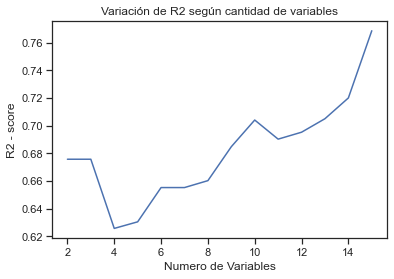

In [69]:
import numpy as np
r2s = []
for i in range(2,16):
    lri = LogisticRegression()
    rfei = RFE(lri, n_features_to_select= i)
    rfei.fit(X_train,Y_train)
    df_featuresi = X.columns.values[rfei.support_ == True]
    Xi = X[df_featuresi]
    score_i = cross_val_score(lri, Xi, state, scoring = "accuracy", cv = 10)
    score_im = score_i.mean()
    r2s.append(score_im)
    
    print("Con {0} variables, el r2 es {1}".format(i,score_im))


plt.plot(range(2,16), r2s)
plt.xlabel("Numero de Variables")
plt.ylabel("R2 - score")
plt.title("Variación de R2 según cantidad de variables")
print("El r2 maximo es {0}, con una cantidad de {1} +2 variables".format(max(r2s), np.where(r2s == max(r2s)) ))


Podemos observar que sacariamos el maximo valor de r2 con un total de 15 variables (en el rango establecido en el bucle).

Si quisieramos saber cuales son esas variables, bastaria con ejecutar el mismo codigo que antes pero aplicando 15 en lugar de 10.

In [70]:
#para ver las 15 variables:
rfef = RFE(lr, n_features_to_select=15)
rfef = rfef.fit(X_train, Y_train)
df_features = X.columns.values[rfef.support_ == True]
Xf = X[df_features]
Xf.columns.values.tolist() #Las variables seleccionadas.

['GENRE 1_Adventure',
 'GENRE 1_Biography',
 'GENRE 1_Comedy',
 'GENRE 1_Drama',
 'GENRE 1_Mystery',
 'YEAR_2008',
 'DIRECTOR_Christopher Nolan',
 'DIRECTOR_Martin Scorsese',
 'ACT 1_Chris Pratt',
 'ACT 1_Christian Bale',
 'ACT 1_Jake Gyllenhaal',
 'ACT 1_Ryan Reynolds',
 'ACT 2_Cillian Murphy',
 'ACT 5_Idris Elba',
 'ACT 5_Mark Ruffalo']

In [71]:
#Guardaremos los valores de los parametros para ir comparando 
#con las demás regresiones.
df_coeff15 = pd.DataFrame({
           "variable": Xf.columns.values})

In [72]:
X_train15, X_test15, Y_train15, Y_test15 = train_test_split(Xf, state, random_state=21, test_size=0.2)
lr15 = lr.fit(X_train15, Y_train15)

In [73]:
#Dataframe que contiene solo las variables que se utilizan en regresión logistica con RFE
df_coeff15["RFE15"] = lr15.coef_.reshape(-1,1)
df_coeff15.head()

variable     RFE15
0            GENRE 1_Adventure -0.866245
1            GENRE 1_Biography  1.600378
2               GENRE 1_Comedy -1.300968
3                GENRE 1_Drama  1.224743
4              GENRE 1_Mystery  0.829417
5                    YEAR_2008 -1.184656
6   DIRECTOR_Christopher Nolan  1.015649
7     DIRECTOR_Martin Scorsese  0.885555
8            ACT 1_Chris Pratt  0.893231
9         ACT 1_Christian Bale  0.963072
10       ACT 1_Jake Gyllenhaal  0.964189
11         ACT 1_Ryan Reynolds -1.074242
12        ACT 2_Cillian Murphy -0.866245
13            ACT 5_Idris Elba -0.866245
14          ACT 5_Mark Ruffalo  1.057931

### Lasso y Ridge

In [74]:
from sklearn.linear_model import RidgeClassifierCV#para computar Ridge usaremos este comando que es más cómodo
#Y para Lasso usaremos un parametro de LogisticRegression.

In [75]:
#Computamos Ridge
rdg = RidgeClassifierCV(alphas = np.logspace(-10, 2, 200), 
                        fit_intercept = True, cv=10)#Notar que este comando ya incluye cross validation.
rdg.fit(X,state)

RidgeClassifierCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.8...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
                  cv=10)

In [76]:
rdg.alpha_#El mejor alpha en Ridge para nuestro modelo

0.1683180353330955

In [77]:
rdg.best_score_#El modelo calculado con el mejor alpha

0.7338095238095238

In [78]:
#Armamos el dataframe para guardar estos parametros
df_params = pd.DataFrame({
         "variable": X.columns.values
})

In [79]:
#Podemos apreciar los valores calculados por Ridge
df_params["rdg"] = rdg.coef_.reshape(-1,1)
df_params.head()

variable       rdg
0            GENRE 1_Action -0.136665
1         GENRE 1_Adventure -0.331072
2         GENRE 1_Animation -0.276610
3         GENRE 1_Biography  0.543375
4            GENRE 1_Comedy -0.592592
..                      ...       ...
990    ACT 5_Zuleyka Silver -0.064698
991    ACT 5_Çağlar Çorumlu -0.074998
992        ACT 5_Özge Borak -0.020665
993   ACT 5_İbrahim Büyükak -0.080798
994  ACT 5_Şinasi Yurtsever -0.019238

[995 rows x 2 columns]

In [80]:
#Computamos Lasso con un bucle para sacar el mejor alpha según r2.

alpha = np.logspace(-10,2,200)
scores_ = []
for a in alpha:
    lss = LogisticRegression(penalty="l1", solver='liblinear', C = a)
    lss.fit(X_train, Y_train)
    sco = lss.score(X_test,Y_test)
    scores_.append([sco,a])#Rellenamos el array con el valor de r2 conjuntamente con su alpha
    dfscore = pd.DataFrame(scores_)#lo pasamos a dataframe para que sea mas facil trabajar
print(dfscore[dfscore[0]== max(dfscore[0])])#La primera fila serían nuestros valores, el r2 seguido por su alpha.

vals = np.array(dfscore[dfscore[0]== max(dfscore[0])])#pasamos a array la primera fila, es la que tiene mayor r2 con menor alpha
alp = vals[0][1]#Obtenemos unicamente el alpha
#Además concluimos que Lasso es difinitivamente el mejor modelo para esta estimación.

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


            0          1
184  0.829268  12.458834


In [81]:
lssf = LogisticRegression(penalty="l1", solver="liblinear", C = alp)#Computamos ahora si Lasso
lssf.fit(X_train,Y_train)
df_params["Lasso"] = lssf.coef_.reshape(-1,1)
df_params.head()#Podemos obsevar los coeficientes de Lasso

variable       rdg     Lasso
0            GENRE 1_Action -0.136665 -1.743806
1         GENRE 1_Adventure -0.331072 -0.952670
2         GENRE 1_Animation -0.276610 -3.174617
3         GENRE 1_Biography  0.543375  6.105661
4            GENRE 1_Comedy -0.592592 -3.343937
..                      ...       ...       ...
990    ACT 5_Zuleyka Silver -0.064698  0.000000
991    ACT 5_Çağlar Çorumlu -0.074998  0.000000
992        ACT 5_Özge Borak -0.020665  0.000000
993   ACT 5_İbrahim Büyükak -0.080798  0.000000
994  ACT 5_Şinasi Yurtsever -0.019238  0.000000

[995 rows x 3 columns]

In [82]:
#creamos un dataframe para ver todos los coeficientes.
df_params = pd.merge(left = df_params, right = df_coeff15, left_on = "variable", right_on = "variable", how = "left")
df_params.head()

variable       rdg     Lasso     RFE15
0            GENRE 1_Action -0.136665 -1.743806       NaN
1         GENRE 1_Adventure -0.331072 -0.952670 -0.866245
2         GENRE 1_Animation -0.276610 -3.174617       NaN
3         GENRE 1_Biography  0.543375  6.105661  1.600378
4            GENRE 1_Comedy -0.592592 -3.343937 -1.300968
..                      ...       ...       ...       ...
990    ACT 5_Zuleyka Silver -0.064698  0.000000       NaN
991    ACT 5_Çağlar Çorumlu -0.074998  0.000000       NaN
992        ACT 5_Özge Borak -0.020665  0.000000       NaN
993   ACT 5_İbrahim Büyükak -0.080798  0.000000       NaN
994  ACT 5_Şinasi Yurtsever -0.019238  0.000000       NaN

[995 rows x 4 columns]

Podemos observar que las variables que Lasso no convirtió en 0 coinciden con las 15 variables elegidas con RFE.

## K Nearest Neighbors
Como último modelo usamremos KNN.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
#Usaremos la versión de entrenamiento de X y state para agilizar el análisis
# X_test,X_train,Y_train, Y_test

In [85]:
Knn = KNeighborsClassifier().fit(X_train, Y_train)

In [86]:
accuracy = Knn.score(X_test, Y_test)

In [87]:
accuracy#Vemos que es casi tan bueno como la regresión logísitica y SVC

0.7317073170731707

## Conclusión
Para concluir el proyecto diremos que parece ser que reclasificar Y conjuntamente con Lasso es la mejor forma de tratar este modelo, además de que las variables escogidas con RFE coindicen con las elegidas por Lasso.
Para finalizar computaremos un dataframe completo con las etiquetas según cada modelo.

In [88]:
#Juntamos todo
df["Forest"] = forest2.predict(X)
df["SVC"] = clf2.predict(X)
df["RFE15"] = lr15.predict(Xf)
df["Ridge"] = rdg.predict(X)
df["Lasso"] = lssf.predict(X)
df["KNN"] = Knn.predict(X)
df["Title"] = start["TITLE"]
df = df[["Forest","SVC","RFE15","Ridge","Lasso","KNN","Title"]]
df_final = pd.merge(left = start.dropna(), right = df, left_on = "TITLE", right_on = "Title", how = "left")
df_final = df_final.drop(["Title"], axis = 1)#Dropeamos para que no quede dos veces el mismo título
df_final["True"] = state#El Y verdadero, según lo aclaramos cuando realizamos la función lambda

In [89]:
df_final.head()#podemos ver la clasificación según modelo

RNK           TITLE  RATE           DIRECTOR  YEAR    GENRE 1    GENRE 2  \
0    1    The Prestige  10.0  Christopher Nolan  2006    Mystery     Sci-Fi   
1    2    Interstellar  10.0  Christopher Nolan  2014     Sci-Fi  Adventure   
2    3       Inception  10.0  Christopher Nolan  2010     Sci-Fi  Adventure   
3    5  Predestination   9.0     Michal Spierig  2014     Sci-Fi      Drama   
4    6            Rush   9.0         Ron Howard  2013  Biography      Sport   

                 ACT 1           ACT 2          ACT 3                 ACT 4  \
0       Christian Bale    Hugh Jackman  Michael Caine    Scarlett Johansson   
1  Matthew McConaughey   Anne Hathaway  Michael Caine      Jessica Chastain   
2    Leonardo DiCaprio  Cillian Murphy  Michael Caine      Marion Cotillard   
3          Ethan Hawke     Noah Taylor    Sarah Snook        Madeleine West   
4      Chris Hemsworth    Daniel Brühl   Olivia Wilde  Alexandra Maria Lara   

                  ACT 5  Forest  SVC  RFE15  Ridge  Lasso  KNN  True  
0           Andy Serkis       1    1      1      1      1    1     1  
1     Timothée Chalamet       1    1      1      1      1    1     1  
2  Joseph Gordon-Levitt       1    1      1      1      1    1     1  
3     Christopher Kirby       1    1      0      1      1    1     1  
4        Natalie Dormer       1    1      1      1      1    1     1

By: Nahuel Cedrés Torres https://www.linkedin.com/in/nahuel-cedr%C3%A9s/